# We build a time series model to forecast CO2 emissions based on deforestation in Côte d'Ivoire. Our work will help civil organisation and national institutions to fight against global warming and in the same time prevent the pollution.

In [1]:
#import packages 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import array
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_absolute_percentage_error

In [2]:
#load the dataset
df = pd.read_excel('CO2emissions.xlsx')
print(df)

    year  forest_cover_loss_ha  gross_emission_co_mg
0   2001         122711.450238          4.593108e+07
1   2002         144559.907509          5.497583e+07
2   2003          86282.296788          3.311582e+07
3   2004          48048.337223          1.841321e+07
4   2005          65320.734864          2.431455e+07
5   2006          97780.651995          3.994800e+07
6   2007          90864.763583          3.735127e+07
7   2008         127554.833134          5.484864e+07
8   2009         108875.815204          5.059884e+07
9   2010          92491.857570          4.251152e+07
10  2011         124683.492728          5.822523e+07
11  2012          96128.737721          4.642876e+07
12  2013         175758.668357          8.452139e+07
13  2014         346792.569241          1.733508e+08
14  2015         152432.452051          7.719480e+07
15  2016         221099.811265          1.151273e+08
16  2017         357273.022158          1.905543e+08
17  2018         324739.877774          1.7743

In [3]:
# set year to index
df["year"] = pd.to_datetime(df["year"])
df.set_index("year", inplace=True)

In [4]:
#convert the type of data from float64 to int64 and print them 
df['gross_emission_co_mg'] = df['gross_emission_co_mg'].astype('int64')
df['forest_cover_loss_ha'] = df['forest_cover_loss_ha'].astype('int64')
print(df)
print(df.dtypes)

                               forest_cover_loss_ha  gross_emission_co_mg
year                                                                     
1970-01-01 00:00:00.000002001                122711              45931081
1970-01-01 00:00:00.000002002                144559              54975834
1970-01-01 00:00:00.000002003                 86282              33115819
1970-01-01 00:00:00.000002004                 48048              18413206
1970-01-01 00:00:00.000002005                 65320              24314546
1970-01-01 00:00:00.000002006                 97780              39947998
1970-01-01 00:00:00.000002007                 90864              37351274
1970-01-01 00:00:00.000002008                127554              54848640
1970-01-01 00:00:00.000002009                108875              50598838
1970-01-01 00:00:00.000002010                 92491              42511515
1970-01-01 00:00:00.000002011                124683              58225229
1970-01-01 00:00:00.000002012         

Text(0, 0.5, 'gross_emission_co_mg')

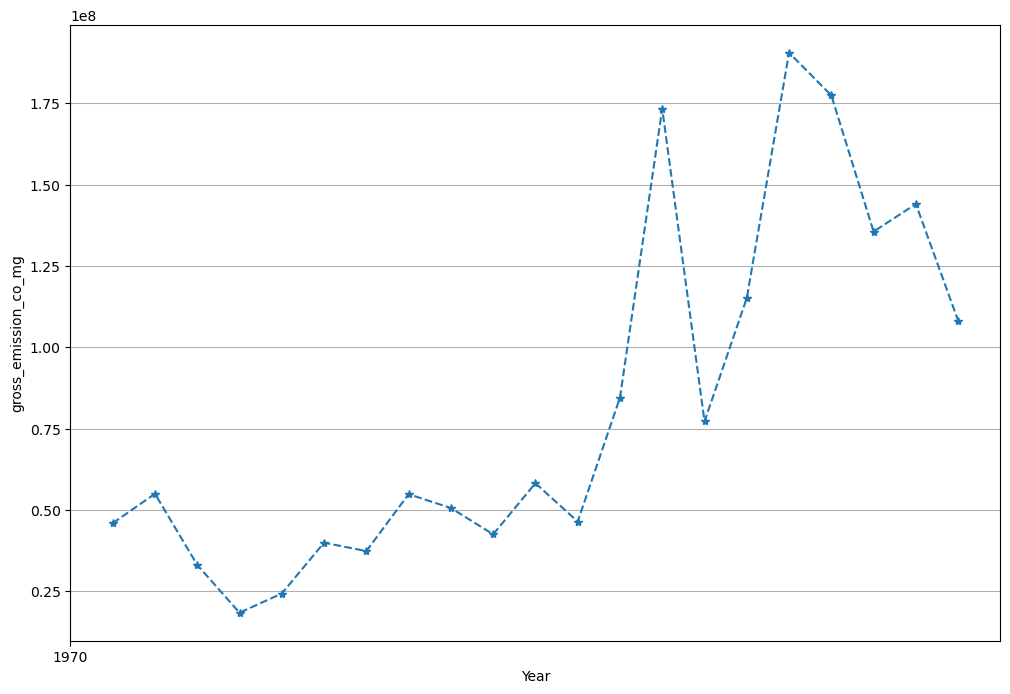

In [5]:
#plotting C02 emission by year
plt.figure(figsize=(12,8)) 
plt.plot(df.index, df.gross_emission_co_mg,'--', marker= '*' ,) 
plt.grid() 
plt.xlabel('Year') 
plt.ylabel('gross_emission_co_mg')

In [6]:
import statsmodels.api as sm 
from pylab import rcParams 
rcParams['figure.figsize'] = 15, 8 
decompose_series = sm.tsa.seasonal_decompose(df['gross_emission_co_mg'], model='additive') 
decompose_series.plot() 
plt.show() 

ValueError: freq N not understood. Please report if you think this is in error.

In [ ]:
#preprocessing data: select the target
X = df.drop(columns= 'gross_emission_co_mg') 
y = df['gross_emission_co_mg']
print(X)

In [ ]:
#split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 0 ) 
print(x_test)

In [ ]:
#define a function to compute the mean absolute percentage error
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

In [ ]:
#Building the Linear Regression Model
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression().fit(x_train , y_train)

#Predictions on Testing data
LR_Test_predict = linear_model.predict(x_test) 

# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(y_test,LR_Test_predict)
print("MAPE: ",LR_MAPE)

In [ ]:
#print the first five predict data 
print(LR_Test_predict)

In [ ]:
#print the predict data in dataframe
df_predict = pd.DataFrame(LR_Test_predict, columns = ['emission_co_mg_predict'])
df_predict

In [ ]:
#plotting the predict data in dataframe
plt.plot(df_predict)
plt.grid()

In [ ]:
#
from statsmodels.tsa.arima.model import ARIMA 
 
AR_model = ARIMA(df_predict, order=(2,0,0)) 
AR_model_results = AR_model.fit()
AR_model_predict = AR_model_results.predict()
plt.plot(df) 
plt.plot(AR_model_results.fittedvalues, color= 'red')

In [ ]:
print(AR_model_predict)

In [ ]:
sample = pd.DataFrame(AR_model_predict, columns = ['emission_co_mg_forecast'])
sample

In [ ]:
sample.to_csv('sample_submission.csv')

In [ ]:
# Using MAPE error metrics to check for the error rate and accuracy level
mape = mean_absolute_percentage_error(df, AR_model_predict)
print(mape)
#mape = np.mean(np.abs(forecast - actual)/np.abs(actual))

In [ ]:
from statsmodels.tsa.stattools import acf, pacf 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
#ACF 
plot_acf(df, lags = range(0,20)) 
plt.show() 
#PACF 
plot_pacf(df, lags = range(0,20)) 
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller 
adf_result = adfuller(df['gross_emission_co_mg']) 
print(f'ADF Statistic: {adf_result[ 0 ]}') 
print(f'p-value: {adf_result[ 1 ]}') 
print(f'No. of lags used: {adf_result[ 2 ]}') 
print(f'No. of observations used:{adf_result[ 3 ]}') 
print('Critical Values:') 
for k, v in adf_result[4].items():
    print(f'{k}:{v}')